<a href="https://colab.research.google.com/github/Rahul-Chouhan-407/Retail-Sales-Prediction/blob/main/Retail_Sales_Prediction_by_Rahul_Chouhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Description
---
Rossmann operates over 3,000 drug Stores in 7 European countries. Currently, Rossmann Store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann Stores. The task is to forecast the "Sales" column for the test set. Note that some Stores in the dataset were temporarily closed for refurbishment.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# To show all the rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Rossmann = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Capstone Project 2 - Retail Sales Prediction/Rossmann Stores Data.csv")
Store = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Capstone Project 2 - Retail Sales Prediction/Store.csv")

In [5]:
Rossmann.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
Store.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
Rossmann['Open'].value_counts().iloc[:5]

1    844392
0    172817
Name: Open, dtype: int64

In [7]:
Rossmann.shape

(1017209, 9)

In [9]:
Rossmann = Rossmann[Rossmann['Sales'] != 0]
Rossmann = Rossmann[Rossmann['Open'] != 0 ]

In [10]:
# Getting the value counts
Rossmann['Open'].value_counts()

1    844338
Name: Open, dtype: int64

In [11]:
#Dropping the open column
Rossmann.drop(['Open'], axis = 1, inplace = True)

In [12]:
#Finding the shape
Rossmann.shape

(844338, 8)

In [13]:
# Getting first 5 rows
Rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [14]:
Rossmann.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [15]:
Rossmann.duplicated().sum()

0

In [16]:
# Getting the info of rossmann
Rossmann.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844338 non-null  int64 
 1   DayOfWeek      844338 non-null  int64 
 2   Date           844338 non-null  object
 3   Sales          844338 non-null  int64 
 4   Customers      844338 non-null  int64 
 5   Promo          844338 non-null  int64 
 6   StateHoliday   844338 non-null  object
 7   SchoolHoliday  844338 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 58.0+ MB


In [17]:
Rossmann['Date'] = pd.to_datetime(Rossmann['Date'])

In [18]:
Rossmann['Year'] = Rossmann['Date'].dt.year
Rossmann['Month'] = Rossmann['Date'].dt.month
Rossmann['Day'] = Rossmann['Date'].dt.day

#Removing weekday bocause we alreaday have one column dayofweek which is the same thing
#rossmann['Weekday'] = rossmann['Date'].dt.weekday

#renaming the dayofweek column to weekday
Rossmann = Rossmann.rename(columns={'DayOfWeek': 'Weekday'})

Rossmann.drop(['Date'], axis = 1, inplace = True)

In [19]:
def weekend(val):
    if val == 6:
        return 1
    elif val == 7:
        return 1
    else:
        return 0

In [21]:
Rossmann['Weekend'] = Rossmann['Weekday'].apply(weekend)

In [22]:
# Getting random sample 
Rossmann.sample(10)

,Store,Weekday,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekend
80854,575,3,5925,478,1,0,0,2015,5,20,0
565396,877,1,6093,889,0,0,0,2014,2,10,0
392485,1069,5,4911,658,1,0,0,2014,7,18,0
401476,643,2,6172,871,0,0,0,2014,7,8,0
200485,901,1,9533,805,1,0,0,2015,2,2,0
313463,491,5,7810,572,1,0,0,2014,10,10,0
852835,646,2,5696,741,1,0,1,2013,5,28,0
798868,199,1,10966,760,1,0,1,2013,7,15,0
498436,817,5,20461,3001,0,0,0,2014,4,11,0
342059,28,2,8668,938,0,0,0,2014,9,9,0


In [23]:
Rossmann['Weekday'].unique()

array([5, 4, 3, 2, 1, 7, 6])

In [24]:
# Getting info of the data
Rossmann.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844338 non-null  int64 
 1   Weekday        844338 non-null  int64 
 2   Sales          844338 non-null  int64 
 3   Customers      844338 non-null  int64 
 4   Promo          844338 non-null  int64 
 5   StateHoliday   844338 non-null  object
 6   SchoolHoliday  844338 non-null  int64 
 7   Year           844338 non-null  int64 
 8   Month          844338 non-null  int64 
 9   Day            844338 non-null  int64 
 10  Weekend        844338 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 77.3+ MB


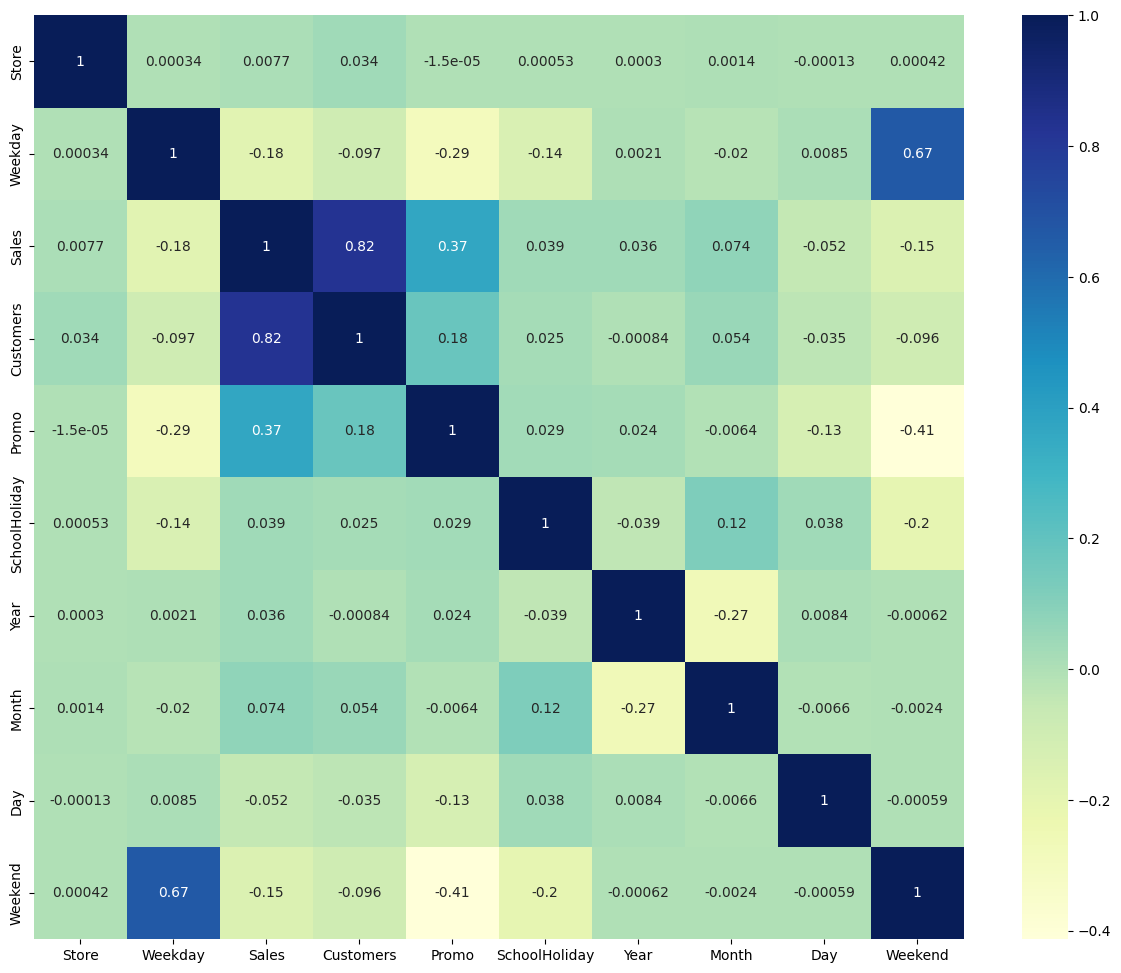

In [25]:
plt.figure(figsize = (15,12))
sns.heatmap(Rossmann.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [27]:
#Getting the first 5 rows
Store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [36]:
# Getting the sum of null values
Store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [37]:
# Replacing the NAN values with median
Store['CompetitionDistance'].fillna(Store['CompetitionDistance'].median(), inplace = True)

# Replacing NAN values with 0 in CompetitionOpenSinceMonth
Store['CompetitionOpenSinceMonth'] = Store['CompetitionOpenSinceMonth'].fillna(0)

# Replacing NAN values with 0 in CompetitionOpenSinceYear
Store['CompetitionOpenSinceYear'] = Store['CompetitionOpenSinceYear'].fillna(0)

# Replacing NAN values with 0 in Promo2SinceWeek
Store['Promo2SinceWeek'] = Store['Promo2SinceWeek'].fillna(0)

# Replacing NAN values with 0 in Promo2SinceYear
Store['Promo2SinceYear'] = Store['Promo2SinceYear'].fillna(0)

# Replacing NAN values with 0 in PromoInterval
Store['PromoInterval'].fillna(Store['PromoInterval'].mode().values[0], inplace = True)

In [38]:
Store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [39]:
Store.duplicated().sum()

0

In [40]:
# Getting the info
Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [41]:
Store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"Jan,Apr,Jul,Oct"
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,"Jan,Apr,Jul,Oct"
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,"Jan,Apr,Jul,Oct"


In [42]:
# Changing the datatype of CompetitionDistance from float to int
Store['CompetitionDistance'] = Store['CompetitionDistance'].astype(int)

# Changing the datatype of CompetitionOpenSinceMonth from float to int
Store['CompetitionOpenSinceMonth'] = Store['CompetitionOpenSinceMonth'].astype(int)

# Changing the datatype of Promo2SinceWeek from float to int
Store['Promo2SinceWeek'] = Store['Promo2SinceWeek'].astype(int)

# Changing the datatype of CompetitionOpenSinceYear from float to int
Store['CompetitionOpenSinceYear'] = Store['CompetitionOpenSinceYear'].astype(int)

# Changing the datatype of Promo2SinceYear from float to int
Store['Promo2SinceYear'] = Store['Promo2SinceYear'].astype(int)

In [43]:
Store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,0,0,"Jan,Apr,Jul,Oct"
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,0,0,"Jan,Apr,Jul,Oct"
4,5,a,a,29910,4,2015,0,0,0,"Jan,Apr,Jul,Oct"


In [44]:
Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Store                      1115 non-null   int64 
 1   StoreType                  1115 non-null   object
 2   Assortment                 1115 non-null   object
 3   CompetitionDistance        1115 non-null   int64 
 4   CompetitionOpenSinceMonth  1115 non-null   int64 
 5   CompetitionOpenSinceYear   1115 non-null   int64 
 6   Promo2                     1115 non-null   int64 
 7   Promo2SinceWeek            1115 non-null   int64 
 8   Promo2SinceYear            1115 non-null   int64 
 9   PromoInterval              1115 non-null   object
dtypes: int64(7), object(3)
memory usage: 87.2+ KB


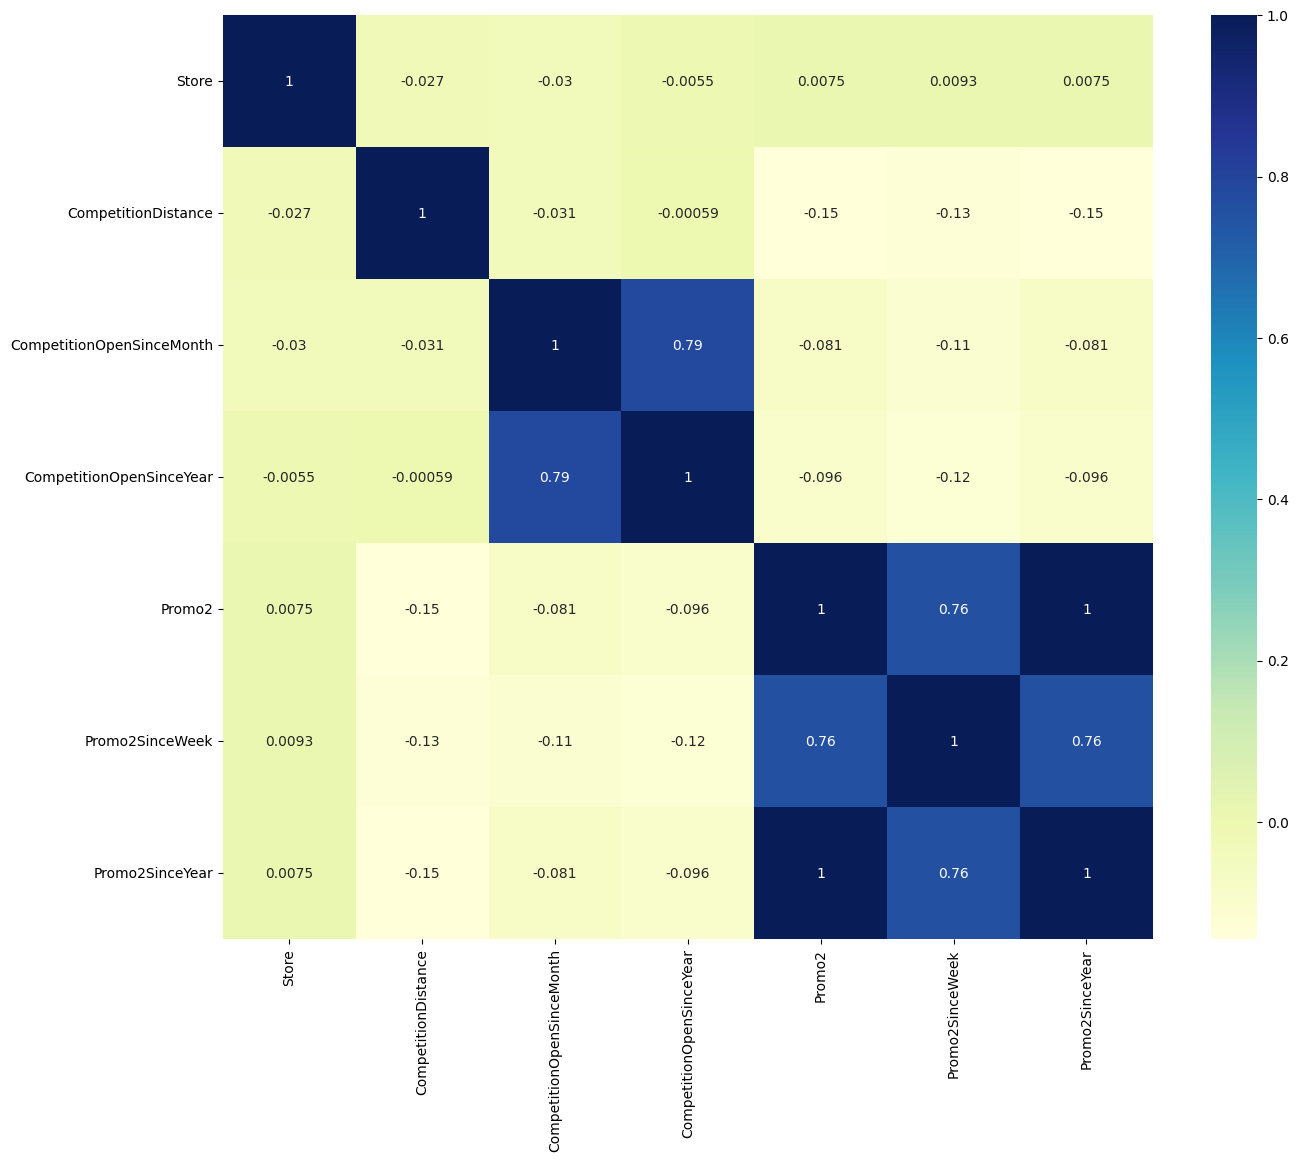

In [45]:
plt.figure(figsize = (15,12))
sns.heatmap(Store.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [46]:
df = pd.merge(Rossmann, Store, on='Store',how='left')
df.head()

,Store,Weekday,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,0,1,2015,7,31,0,c,a,1270,9,2008,0,0,0,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,0,1,2015,7,31,0,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,0,1,2015,7,31,0,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,0,1,2015,7,31,0,c,c,620,9,2009,0,0,0,"Jan,Apr,Jul,Oct"
4,5,5,4822,559,1,0,1,2015,7,31,0,a,a,29910,4,2015,0,0,0,"Jan,Apr,Jul,Oct"


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Store                      844338 non-null  int64 
 1   Weekday                    844338 non-null  int64 
 2   Sales                      844338 non-null  int64 
 3   Customers                  844338 non-null  int64 
 4   Promo                      844338 non-null  int64 
 5   StateHoliday               844338 non-null  object
 6   SchoolHoliday              844338 non-null  int64 
 7   Year                       844338 non-null  int64 
 8   Month                      844338 non-null  int64 
 9   Day                        844338 non-null  int64 
 10  Weekend                    844338 non-null  int64 
 11  StoreType                  844338 non-null  object
 12  Assortment                 844338 non-null  object
 13  CompetitionDistance        844338 non-null  

<Axes: >

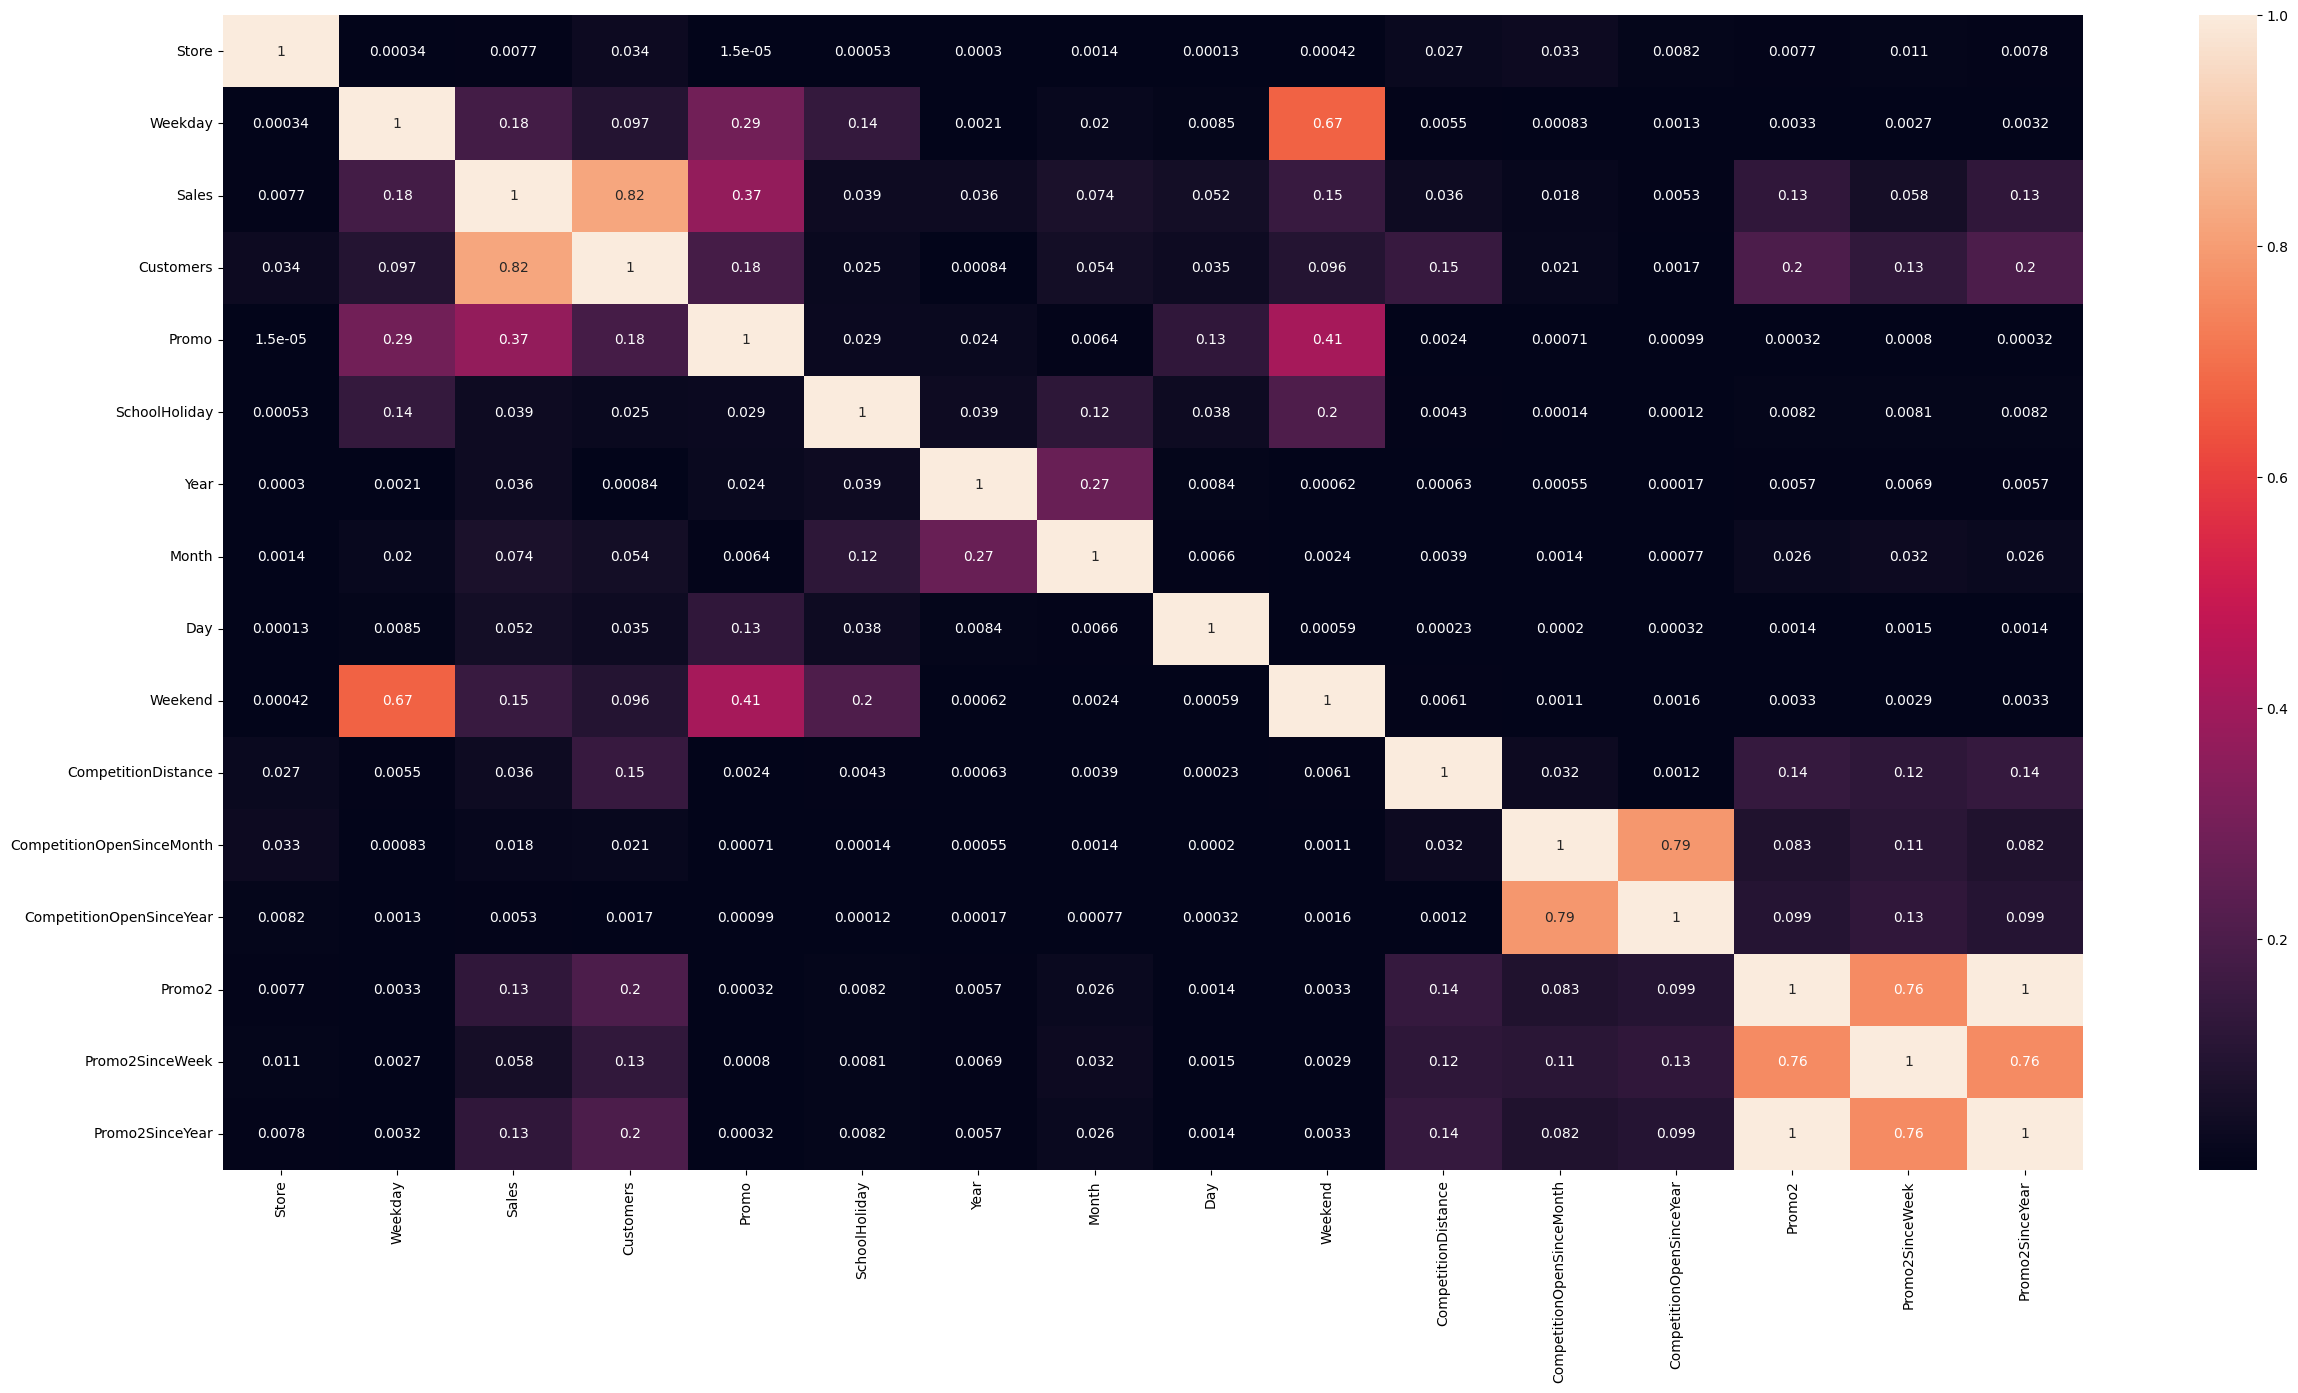

In [48]:
plt.figure(figsize = (30,15))
sns.heatmap(abs(df.corr()), annot = True)

In [49]:
# Getting first 5 rows
df.head()

,Store,Weekday,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,0,1,2015,7,31,0,c,a,1270,9,2008,0,0,0,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,0,1,2015,7,31,0,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,0,1,2015,7,31,0,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,0,1,2015,7,31,0,c,c,620,9,2009,0,0,0,"Jan,Apr,Jul,Oct"
4,5,5,4822,559,1,0,1,2015,7,31,0,a,a,29910,4,2015,0,0,0,"Jan,Apr,Jul,Oct"


In [50]:
# Grouping the year with sales for visualization
year_on_sale = df.groupby(['Year'])['Sales'].mean()
year_on_sale

Year
2013    6814.775168
2014    7026.128505
2015    7088.235123
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Year on Year Growth')

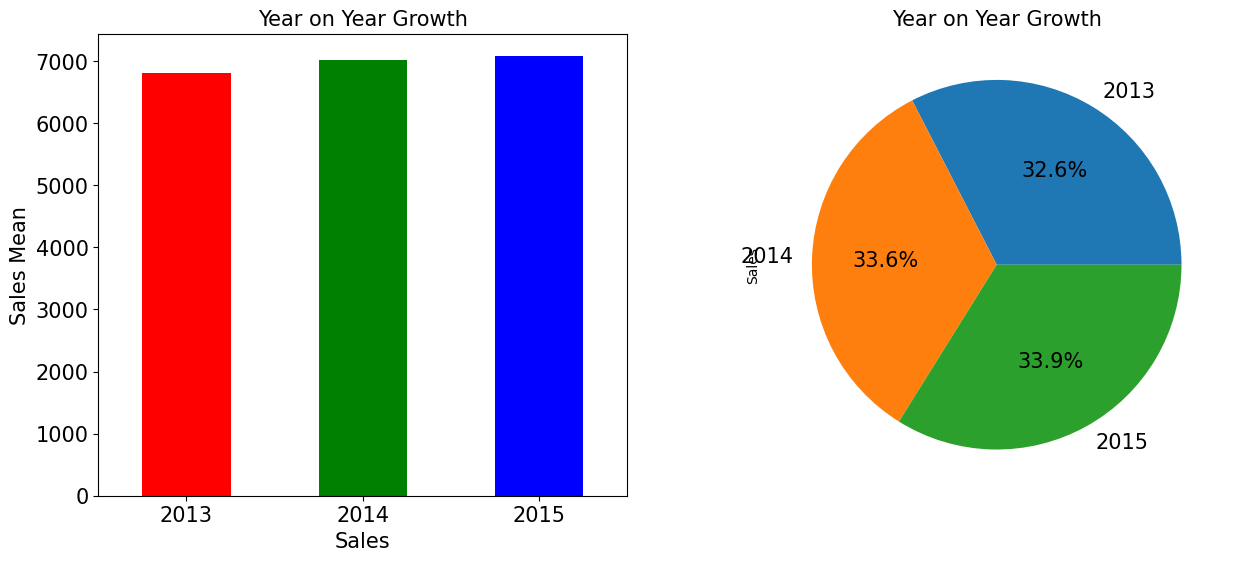

In [51]:
# Visualizong using bar graph
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
year_on_sale.plot(kind = 'bar', color = ['r', 'g', 'b'], fontsize = 15)
plt.xticks(rotation = 360)
plt.title("Year on Year Growth", fontsize = 15)
plt.xlabel("Sales", fontsize = 15)
plt.ylabel("Sales Mean",  fontsize = 15)

# Visualizing with pie plot
plt.subplot(1,2,2)
year_on_sale.plot(kind = 'pie', fontsize = 15, autopct = '%1.1f%%')
plt.title("Year on Year Growth", fontsize = 15)

In [52]:
df.head()

,Store,Weekday,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,0,1,2015,7,31,0,c,a,1270,9,2008,0,0,0,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,0,1,2015,7,31,0,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,0,1,2015,7,31,0,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,0,1,2015,7,31,0,c,c,620,9,2009,0,0,0,"Jan,Apr,Jul,Oct"
4,5,5,4822,559,1,0,1,2015,7,31,0,a,a,29910,4,2015,0,0,0,"Jan,Apr,Jul,Oct"


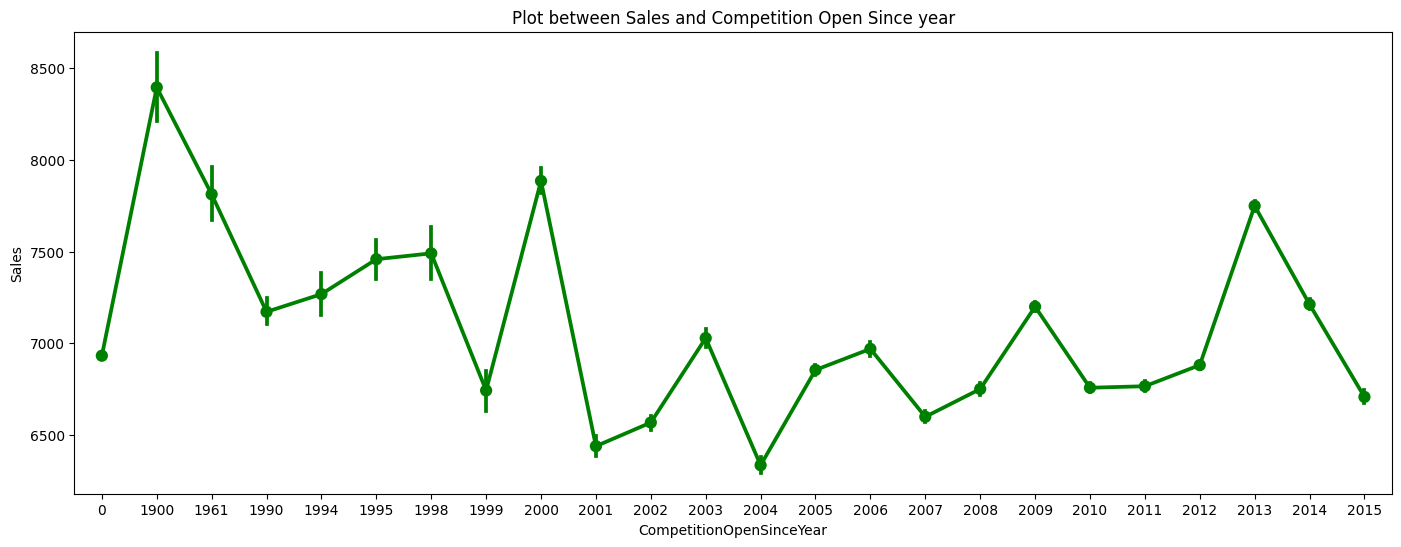

In [53]:
# Visulaizing using point plot
plt.figure(figsize=(17,6))
sns.pointplot(data = df, x= df['CompetitionOpenSinceYear'], y= df['Sales'], color = 'g')
plt.title('Plot between Sales and Competition Open Since year')
plt.show()

In [54]:
df.head()

,Store,Weekday,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,0,1,2015,7,31,0,c,a,1270,9,2008,0,0,0,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,0,1,2015,7,31,0,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,0,1,2015,7,31,0,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,0,1,2015,7,31,0,c,c,620,9,2009,0,0,0,"Jan,Apr,Jul,Oct"
4,5,5,4822,559,1,0,1,2015,7,31,0,a,a,29910,4,2015,0,0,0,"Jan,Apr,Jul,Oct"


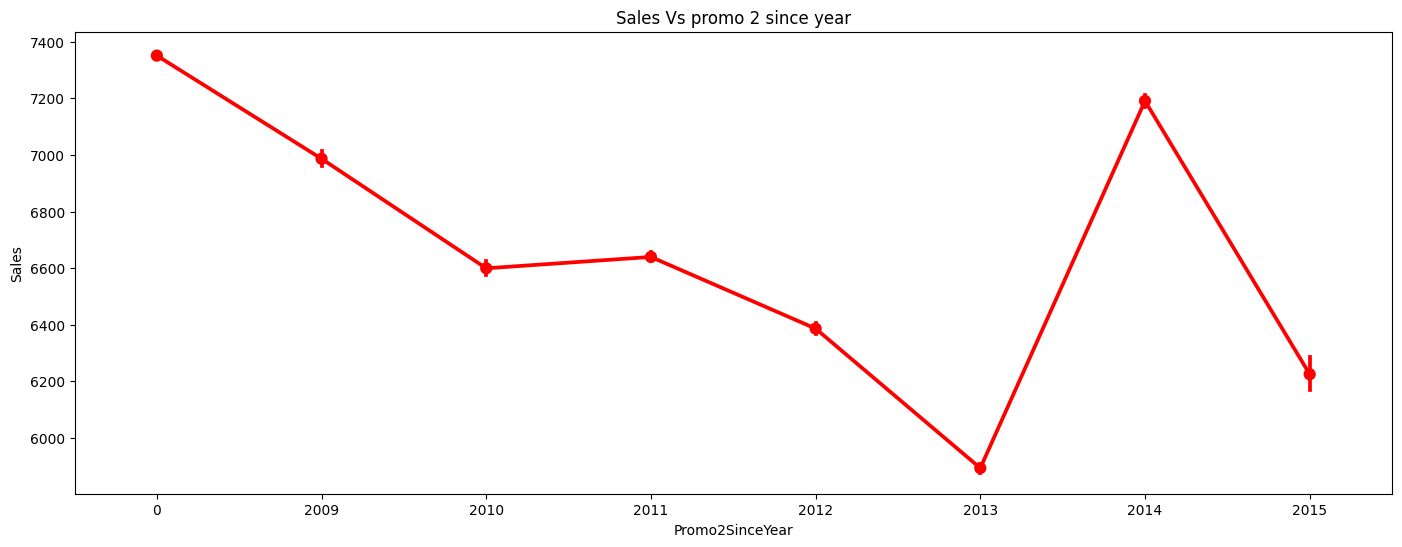

In [55]:
# Visualizing using point plot
plt.figure(figsize=(17,6))
sns.pointplot(data = df, x = df['Promo2SinceYear'], y = df['Sales'], color = 'r')
plt.title("Sales Vs promo 2 since year")
plt.show()

In [56]:
df.head()

,Store,Weekday,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,0,1,2015,7,31,0,c,a,1270,9,2008,0,0,0,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,0,1,2015,7,31,0,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,0,1,2015,7,31,0,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,0,1,2015,7,31,0,c,c,620,9,2009,0,0,0,"Jan,Apr,Jul,Oct"
4,5,5,4822,559,1,0,1,2015,7,31,0,a,a,29910,4,2015,0,0,0,"Jan,Apr,Jul,Oct"


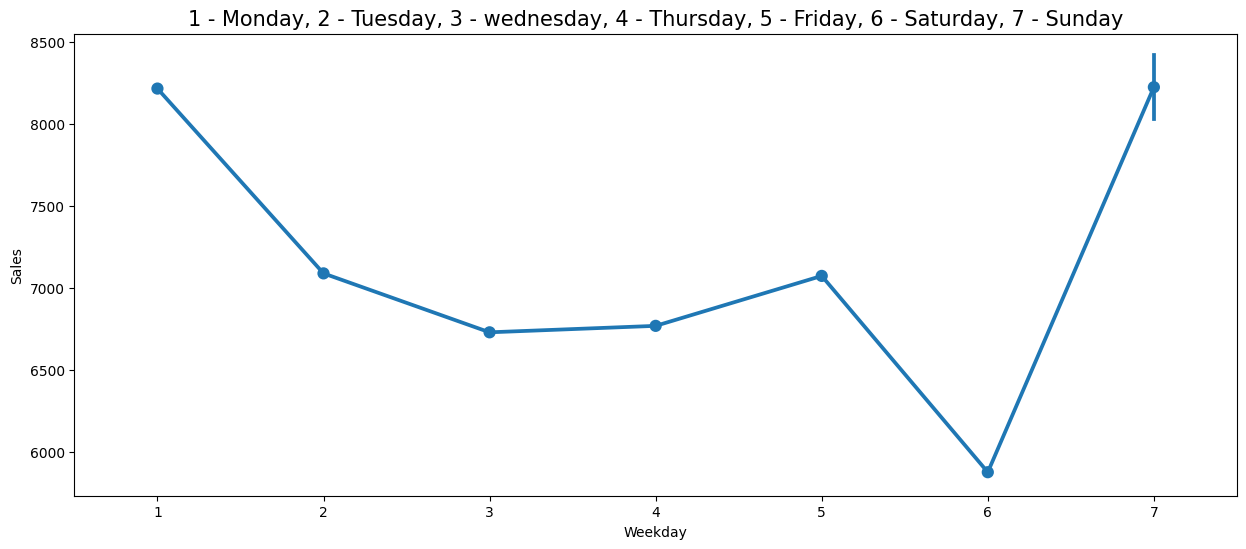

In [57]:
# Visualizing using pointplot
plt.figure(figsize=(15,6))
sns.pointplot(data = df, x = df['Weekday'], y= df['Sales'])
plt.title("1 - Monday, 2 - Tuesday, 3 - wednesday, 4 - Thursday, 5 - Friday, 6 - Saturday, 7 - Sunday", fontsize = 15)
plt.show()

In [58]:
df.head()

,Store,Weekday,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,0,1,2015,7,31,0,c,a,1270,9,2008,0,0,0,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,0,1,2015,7,31,0,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,0,1,2015,7,31,0,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,0,1,2015,7,31,0,c,c,620,9,2009,0,0,0,"Jan,Apr,Jul,Oct"
4,5,5,4822,559,1,0,1,2015,7,31,0,a,a,29910,4,2015,0,0,0,"Jan,Apr,Jul,Oct"


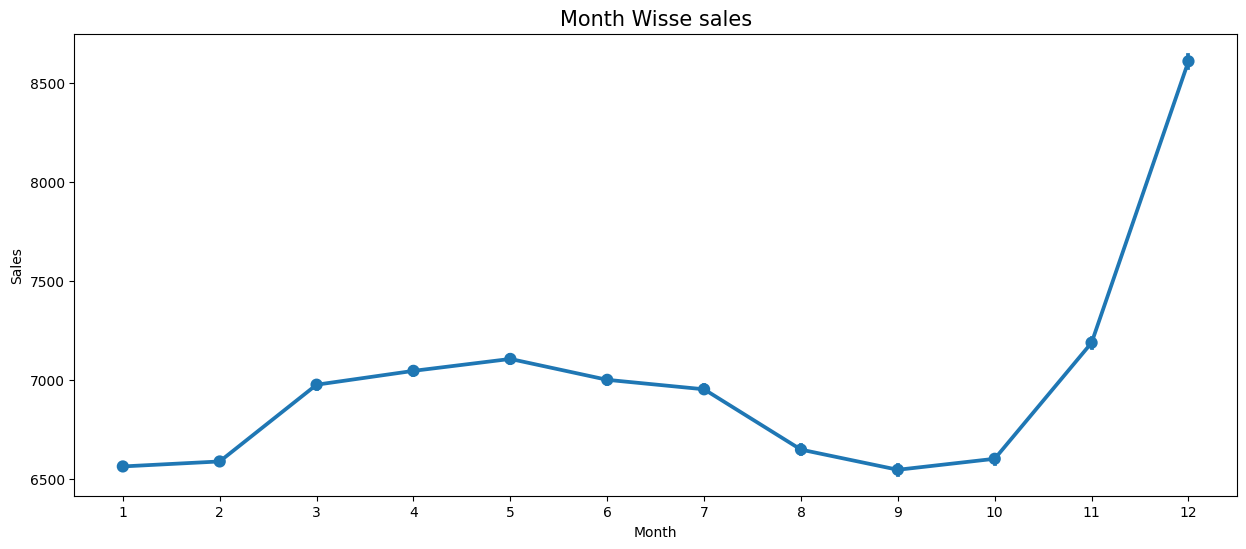

In [59]:
# Visualizing using pointplot
plt.figure(figsize = (15,6))
sns.pointplot(data = df, x = df['Month'], y = df['Sales'])
plt.title("Month Wisse sales", fontsize = 15)
plt.show()

In [60]:
# Getting the First 5 rows
df.head()

,Store,Weekday,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,0,1,2015,7,31,0,c,a,1270,9,2008,0,0,0,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,0,1,2015,7,31,0,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,0,1,2015,7,31,0,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,0,1,2015,7,31,0,c,c,620,9,2009,0,0,0,"Jan,Apr,Jul,Oct"
4,5,5,4822,559,1,0,1,2015,7,31,0,a,a,29910,4,2015,0,0,0,"Jan,Apr,Jul,Oct"


In [61]:
december = df[df['Month'] == 12]
december.head()

,Store,Weekday,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
196029,1,3,2605,327,0,0,1,2014,12,31,0,c,a,1270,9,2008,0,0,0,"Jan,Apr,Jul,Oct"
196030,2,3,2269,252,0,0,1,2014,12,31,0,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
196031,3,3,3804,408,0,0,1,2014,12,31,0,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
196032,4,3,10152,1311,0,0,1,2014,12,31,0,c,c,620,9,2009,0,0,0,"Jan,Apr,Jul,Oct"
196033,5,3,1830,217,0,0,1,2014,12,31,0,a,a,29910,4,2015,0,0,0,"Jan,Apr,Jul,Oct"


In [62]:
# Getting the value count
december.groupby(['Day'])['Sales'].mean()

Day
1     11026.264706
2     10642.079024
3      9352.908780
4      9150.200976
5      9804.197561
6      7273.598049
7      6567.294430
8      7083.043022
9      6798.685366
10     6520.997561
11     6595.880000
12     6839.711707
13     7215.386829
14     7212.126437
15    12969.971639
16    12802.247805
17    10993.843415
18    10730.676098
19    10370.127805
20     9898.003415
21     9128.383538
22    11704.693666
23    12225.453659
24     4802.694634
25     9029.424242
26    10364.078947
27     6770.175610
28     6102.494728
29     7831.228125
30     8711.160000
31     4112.417073
Name: Sales, dtype: float64

<Axes: xlabel='Day', ylabel='Sales'>

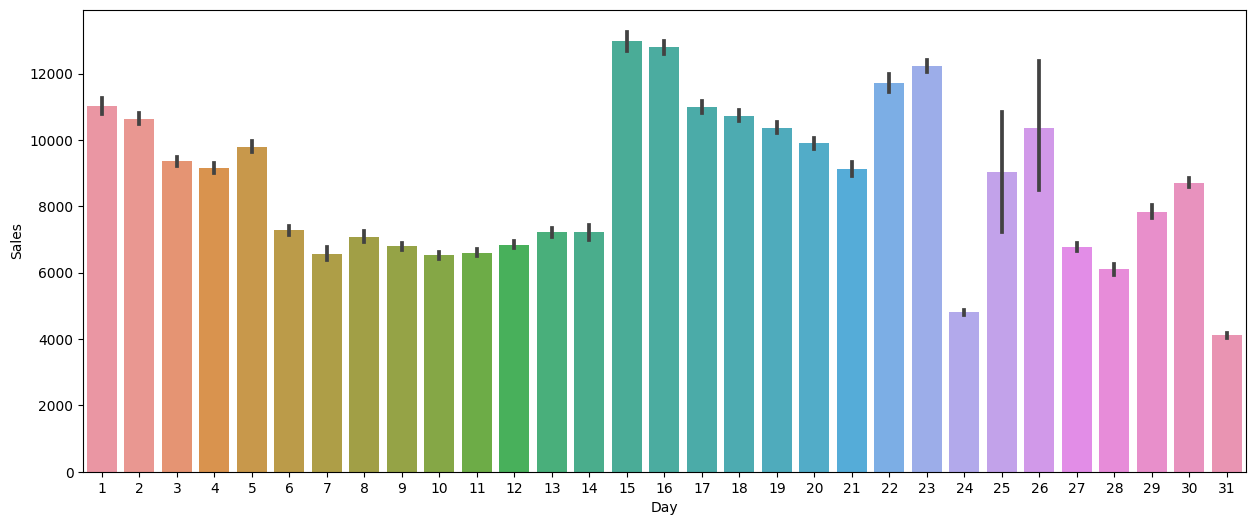

In [63]:
plt.figure(figsize = (15,6))
sns.barplot(data = december, x = december['Day'], y = december["Sales"])

In [64]:
df.sample(10)

,Store,Weekday,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
669407,553,3,5054,494,0,0,0,2013,7,10,0,c,a,3040,9,2002,1,13,2010,"Jan,Apr,Jul,Oct"
58149,654,1,11579,994,1,0,0,2015,6,1,0,c,a,6930,9,2006,0,0,0,"Jan,Apr,Jul,Oct"
26558,828,6,2586,298,0,0,0,2015,7,4,1,d,c,3290,12,2014,0,0,0,"Jan,Apr,Jul,Oct"
604615,463,1,5273,891,0,0,0,2013,9,16,0,a,a,4160,0,0,0,0,0,"Jan,Apr,Jul,Oct"
585356,286,1,9379,707,1,0,0,2013,10,7,0,a,a,1460,4,2015,0,0,0,"Jan,Apr,Jul,Oct"
722587,788,2,19375,1846,1,0,0,2013,5,14,0,a,c,1530,3,2013,0,0,0,"Jan,Apr,Jul,Oct"
518915,148,1,15340,1236,1,0,0,2013,12,16,0,a,a,2090,12,2008,0,0,0,"Jan,Apr,Jul,Oct"
53507,903,6,12126,796,0,0,0,2015,6,6,1,d,c,7290,9,2014,0,0,0,"Jan,Apr,Jul,Oct"
555927,337,4,5249,371,1,0,0,2013,11,7,0,d,c,10600,7,2005,1,45,2014,"Feb,May,Aug,Nov"
518982,215,1,12712,807,1,0,0,2013,12,16,0,d,a,150,0,0,1,45,2009,"Feb,May,Aug,Nov"


In [65]:
df.groupby(['Weekend'])['Sales'].mean()

Weekend
0    7172.903208
1    5932.264337
Name: Sales, dtype: float64

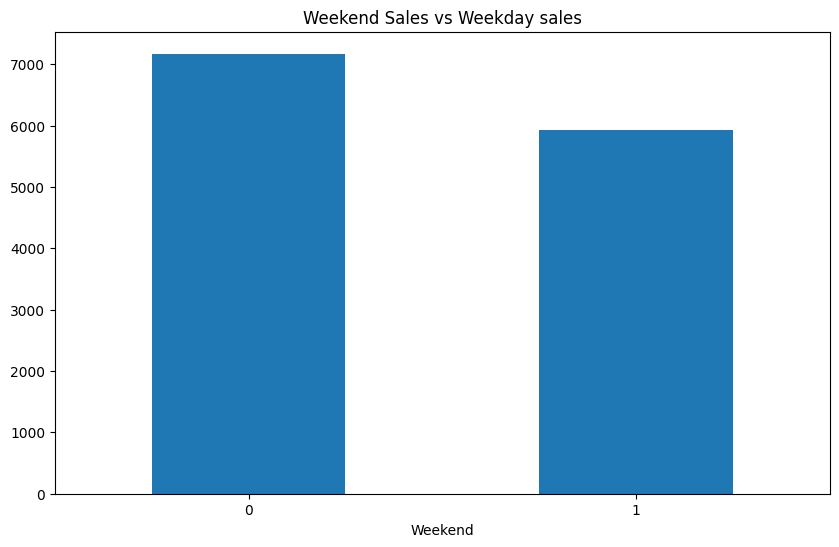

In [66]:
# Visualizing using barplot
plt.figure(figsize = (10,6))
df.groupby(['Weekend'])['Sales'].mean().plot(kind = 'bar')
plt.xticks(rotation = 360)
plt.title("Weekend Sales vs Weekday sales")
plt.show()

In [67]:
df.head()

,Store,Weekday,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,0,1,2015,7,31,0,c,a,1270,9,2008,0,0,0,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,0,1,2015,7,31,0,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,0,1,2015,7,31,0,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,0,1,2015,7,31,0,c,c,620,9,2009,0,0,0,"Jan,Apr,Jul,Oct"
4,5,5,4822,559,1,0,1,2015,7,31,0,a,a,29910,4,2015,0,0,0,"Jan,Apr,Jul,Oct"


In [68]:
# Grouping the days from different month with mean of sales
day_wise_sales = df.groupby(['Day'])['Sales'].mean()
day_wise_sales

Day
1     8054.505835
2     7987.998803
3     7765.916826
4     7746.632622
5     7556.054806
6     7149.914351
7     7101.614663
8     6785.606424
9     6499.517013
10    6429.867986
11    6088.286098
12    6186.692977
13    6570.339941
14    6606.648700
15    7018.797807
16    7314.330149
17    7284.416418
18    7340.772490
19    7115.279322
20    6955.004553
21    6693.696159
22    6544.923929
23    6498.481514
24    5916.886849
25    5968.280641
26    6190.007567
27    6636.996208
28    6943.514789
29    7514.074032
30    8355.098655
31    7577.710796
Name: Sales, dtype: float64

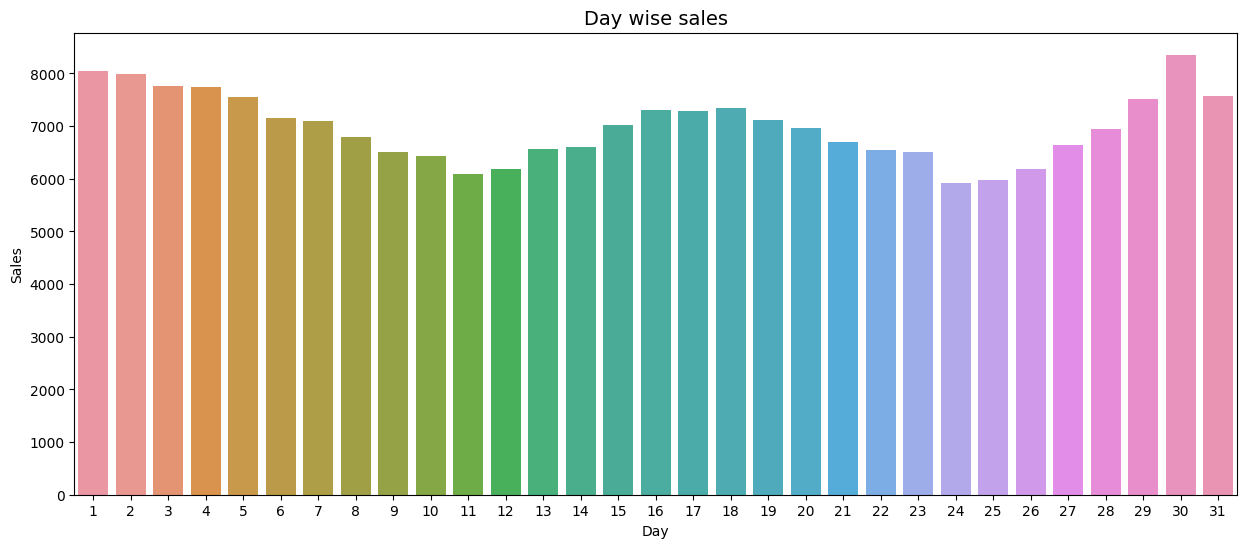

In [69]:
plt.figure(figsize = (15,6))
sns.barplot(data = df, x = day_wise_sales.keys(), y = day_wise_sales)
plt.title("Day wise sales", fontsize = 14)
plt.show()

In [70]:
store_type = df.groupby(['StoreType'])['Sales'].mean()
store_type

StoreType
a     6925.697986
b    10233.380141
c     6933.126425
d     6822.300064
Name: Sales, dtype: float64

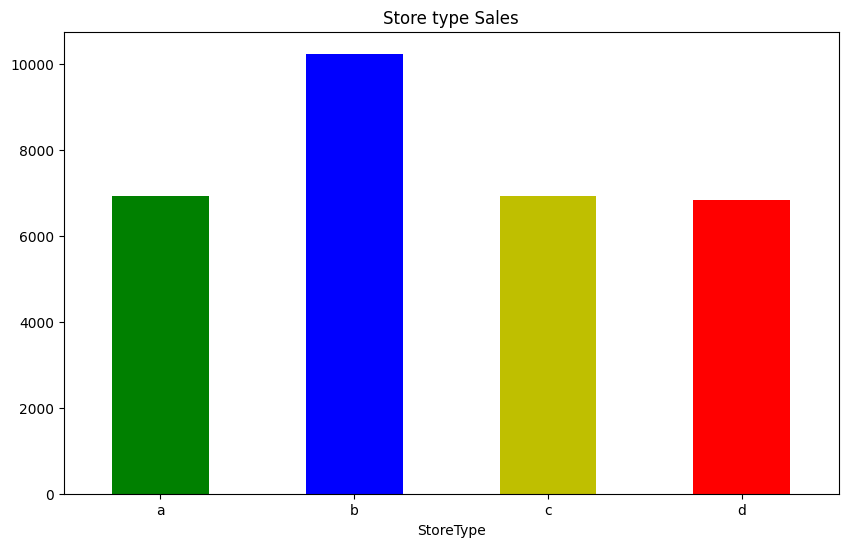

In [71]:
plt.figure(figsize = (10,6))
store_type.plot(kind = 'bar', color = ['g','b', 'y', 'r'])
plt.xticks(rotation = 360)
plt.title("Store type Sales")
plt.show()

In [72]:
df.head()

,Store,Weekday,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,0,1,2015,7,31,0,c,a,1270,9,2008,0,0,0,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,0,1,2015,7,31,0,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,0,1,2015,7,31,0,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,0,1,2015,7,31,0,c,c,620,9,2009,0,0,0,"Jan,Apr,Jul,Oct"
4,5,5,4822,559,1,0,1,2015,7,31,0,a,a,29910,4,2015,0,0,0,"Jan,Apr,Jul,Oct"


In [73]:
df.groupby(['PromoInterval'])['Sales'].mean()

PromoInterval
Feb,May,Aug,Nov     6427.367069
Jan,Apr,Jul,Oct     7123.437381
Mar,Jun,Sept,Dec    6215.888185
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Promo Interval')

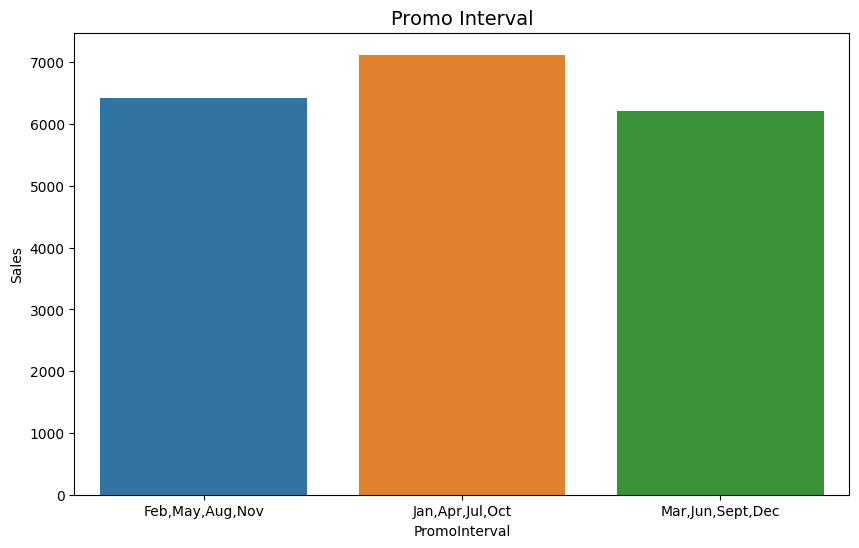

In [74]:
# Visualizing using Barplot
plt.figure(figsize = (10,6))
sns.barplot(data = df, x = df.groupby(['PromoInterval'])['Sales'].mean().keys(),
            y =df.groupby(['PromoInterval'])['Sales'].mean())
plt.title("Promo Interval", fontsize = 14)

In [ ]:
df.head()

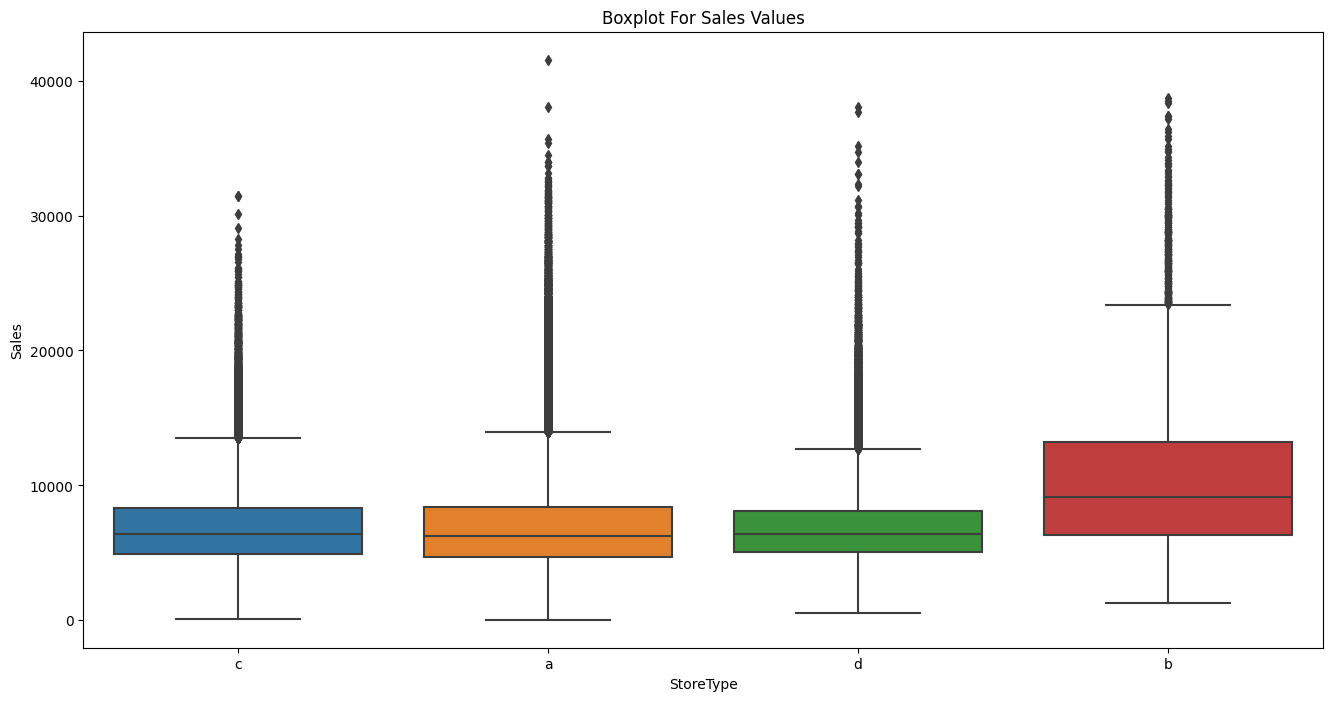

In [75]:
# Visualizing the boxplot for stroretype with sales
plt.figure(figsize = (16,8))
sns.boxplot(data = df, x = df['StoreType'], y = df['Sales'])
plt.title('Boxplot For Sales Values')
plt.show()

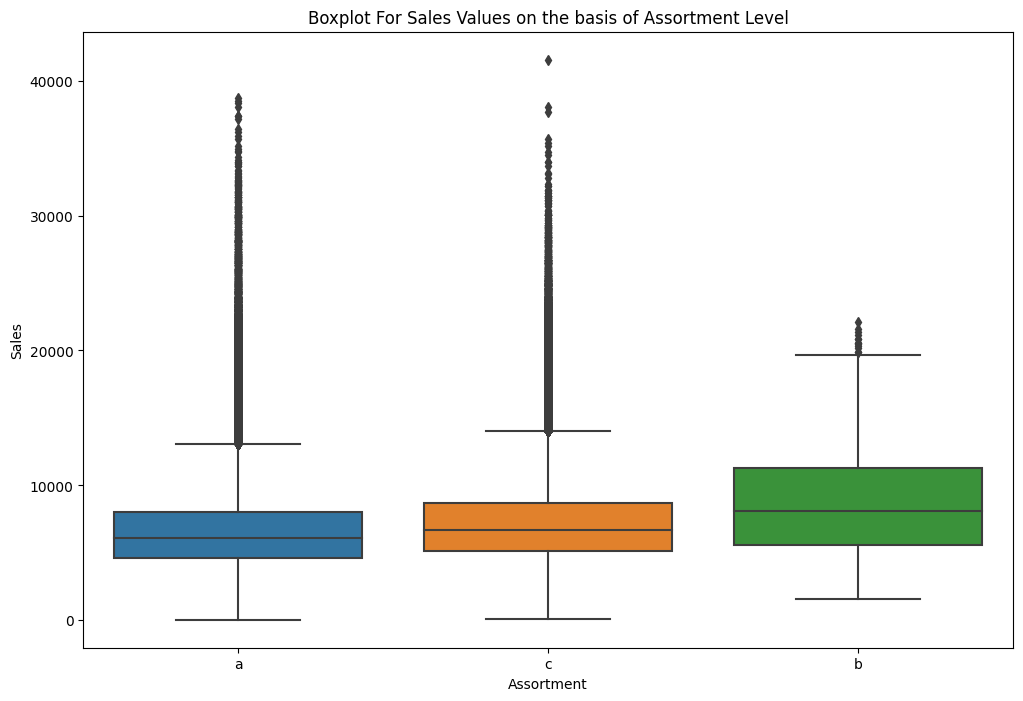

In [76]:
# Visualizing the boxplot for assortment
plt.figure(figsize=(12, 8))
sns.boxplot(x="Assortment", y="Sales", data=df)
plt.title('Boxplot For Sales Values on the basis of Assortment Level')
plt.show()

In [77]:
# Defining a function calc_vif to calculate the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [78]:
# Calculating the VIF
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,4.030699e+00
1,Weekday,9.381469e+00
2,Customers,5.217864e+00
3,Promo,2.288766e+00
4,SchoolHoliday,1.319086e+00
5,Year,2.828420e+01
6,Month,4.170063e+00
7,Day,4.417196e+00
8,Weekend,2.496299e+00
9,CompetitionDistance,1.584958e+00


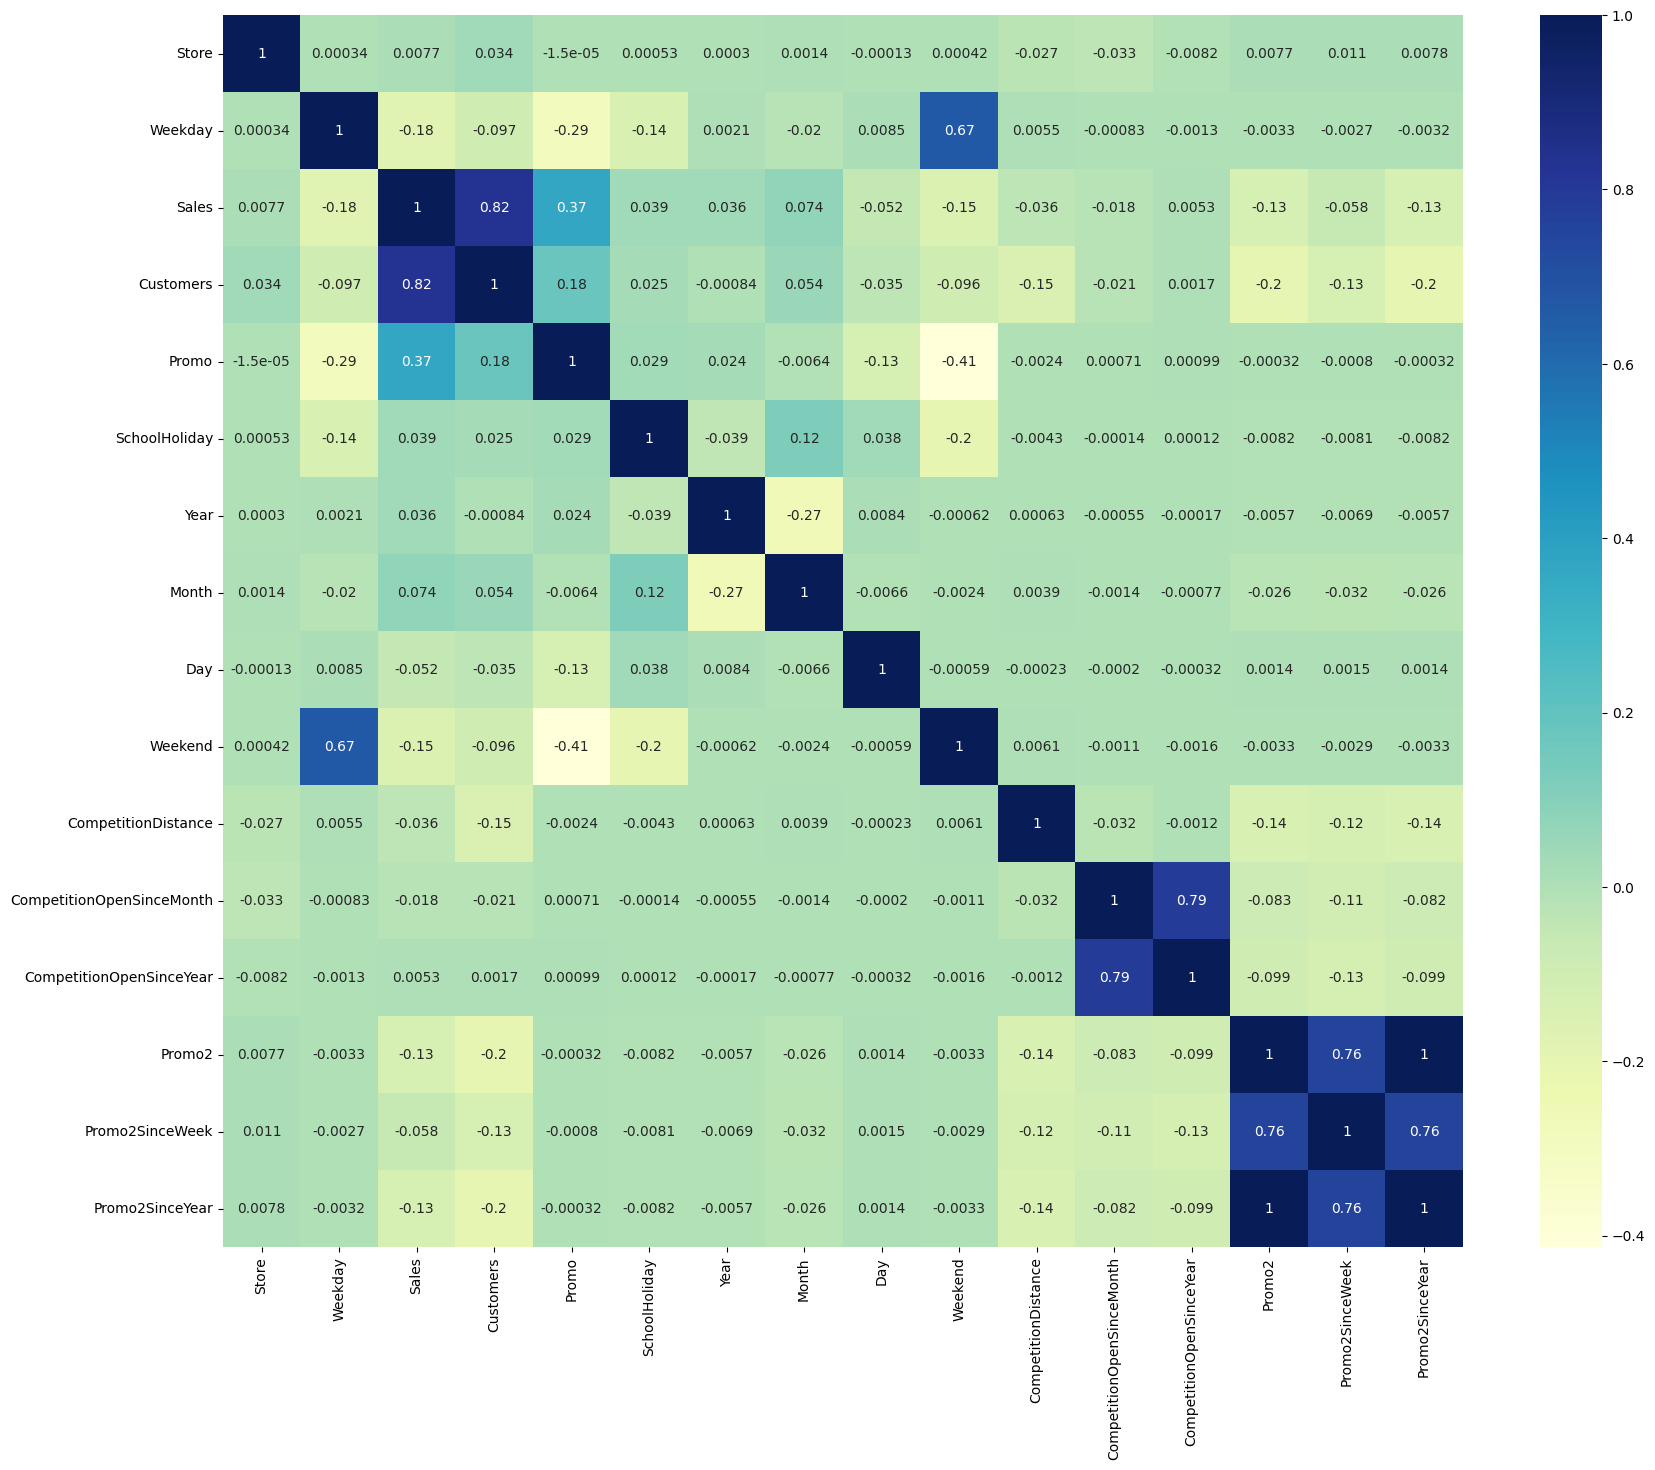

In [79]:
plt.figure(figsize = (20,16))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [80]:
# Calculating the VIF
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales','Year','Promo2SinceYear', 'Weekend']]])

,variables,VIF
0,Store,3.612927
1,Weekday,4.306986
2,Customers,4.268165
3,Promo,1.910253
4,SchoolHoliday,1.272439
5,Month,3.747233
6,Day,3.744487
7,CompetitionDistance,1.480676
8,CompetitionOpenSinceMonth,6.091867
9,CompetitionOpenSinceYear,8.046782


In [81]:
df = df.drop(['Year','Promo2SinceYear', 'Weekend'], axis = 1)

In [82]:
df = pd.get_dummies(df, columns = ['StoreType','Assortment','PromoInterval', 'StateHoliday'])
df.sample(10)

,Store,Weekday,Sales,Customers,Promo,SchoolHoliday,Month,Day,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",StateHoliday_0,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
117120,94,3,5475,502,0,0,3,25,14620,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
522628,499,4,4628,712,0,0,12,12,450,0,0,1,5,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0
363296,806,4,7572,548,1,0,6,5,260,0,0,1,44,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0
389360,1107,4,6845,736,1,0,5,8,1400,6,2012,1,13,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
766518,867,7,1411,148,0,0,3,24,21810,9,2012,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
326441,753,5,8485,728,1,1,7,18,540,11,2012,1,35,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0
317612,257,2,5596,620,1,1,7,29,420,12,2012,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0
303387,39,5,3805,533,0,1,8,15,260,10,2006,1,31,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0
216142,433,4,7619,722,1,0,12,4,30030,11,2010,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0
70276,419,1,7550,1027,1,0,5,18,1620,9,2009,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0


In [83]:
# Getting the info of the new final dataset before the model is built.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   Store                           844338 non-null  int64
 1   Weekday                         844338 non-null  int64
 2   Sales                           844338 non-null  int64
 3   Customers                       844338 non-null  int64
 4   Promo                           844338 non-null  int64
 5   SchoolHoliday                   844338 non-null  int64
 6   Month                           844338 non-null  int64
 7   Day                             844338 non-null  int64
 8   CompetitionDistance             844338 non-null  int64
 9   CompetitionOpenSinceMonth       844338 non-null  int64
 10  CompetitionOpenSinceYear        844338 non-null  int64
 11  Promo2                          844338 non-null  int64
 12  Promo2SinceWeek                 844338 non-n

In [84]:
# Create the data of independent variables
x = df.drop(['Sales'], axis = 1).values # independent variable

# Create the data of dependent variable
y = df['Sales'].values # dependent variable, Y = mx + c, Y = b0+ b1x1 + b2x2 + ... + bnxn

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [86]:
# Printing the shape of the train and test dataset
print(x_train.shape)
print(x_test.shape)

(591036, 27)
(253302, 27)


In [87]:
# Importing MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [88]:
# Getting the coeficient after scaling
x_train

array([[0.50987433, 0.5       , 0.1339774 , ..., 0.        , 0.        ,
        0.        ],
       [0.93716338, 0.83333333, 0.11192125, ..., 0.        , 0.        ,
        0.        ],
       [0.09964093, 0.33333333, 0.12504557, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.83123878, 0.33333333, 0.12231134, ..., 0.        , 0.        ,
        0.        ],
       [0.47755835, 0.        , 0.2034269 , ..., 0.        , 0.        ,
        0.        ],
       [0.52513465, 0.33333333, 0.44750273, ..., 0.        , 0.        ,
        0.        ]])

In [89]:
# Importing the LinearRegression model from SCIKIT learn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [90]:
#Prediction the value
y_pred = lr.predict(x_test)
y_pred

array([5258., 9868., 8810., ..., 5500., 4002., 6394.])

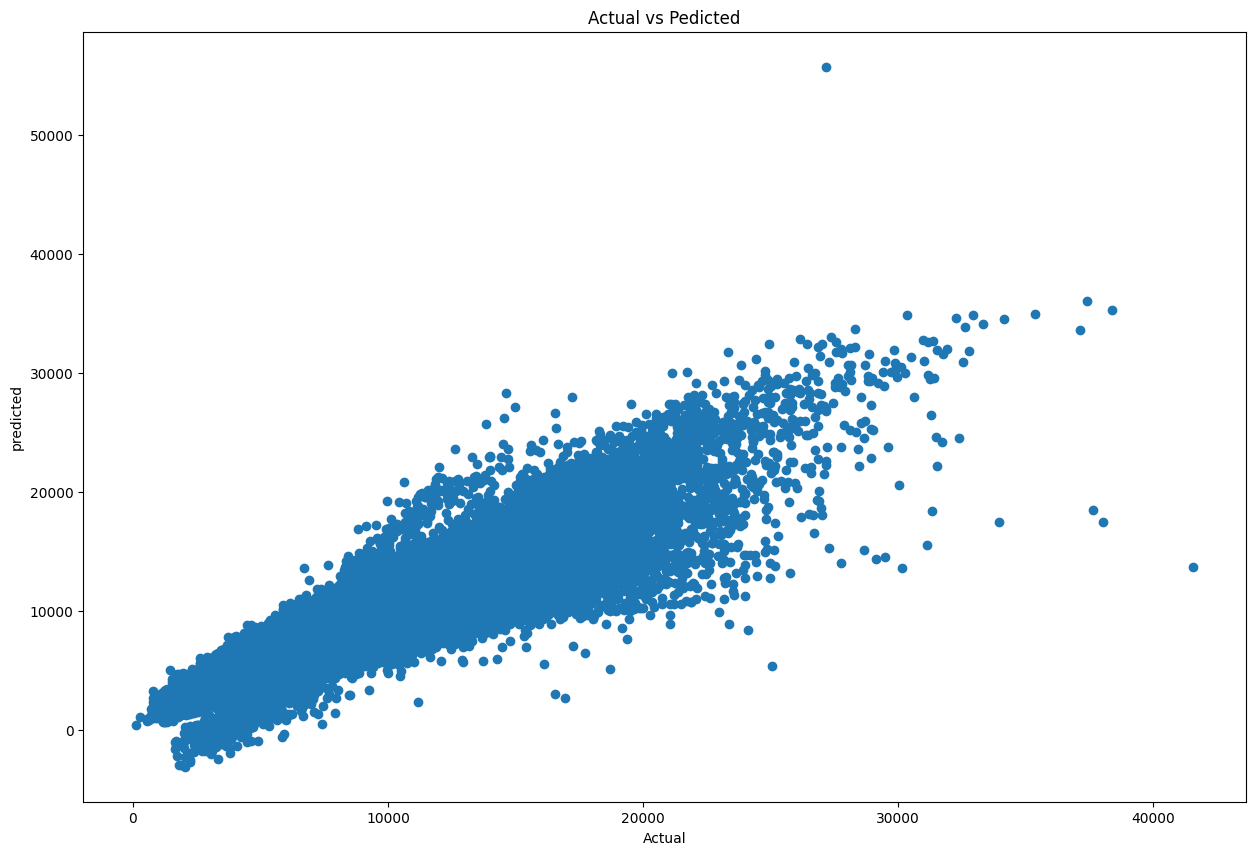

In [91]:
# Visualizing the actual and predicted values
plt.figure(figsize = (15,10))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Pedicted')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

In [92]:
# Getting the difference between actial and predicted value
predicted_value = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
predicted_value.sample(10)

,Actual Value,Predicted Value,Difference
26354,3997,3098.0,899.0
92597,12064,10420.0,1644.0
182228,7395,7834.0,-439.0
157639,1997,2538.0,-541.0
95186,3123,3848.0,-725.0
190915,5719,7282.0,-1563.0
69423,7386,8288.0,-902.0
105076,8390,8736.0,-346.0
248837,4861,5182.0,-321.0
20311,7542,6944.0,598.0


In [93]:
# Importing Evaluation metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error
MSE = mean_squared_error(y_test, y_pred)
print("MSE :",MSE)

# Root mean Square error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R squared
r2 = r2_score(y_test, y_pred)
print("R2 Linear regression :" ,r2*100)

MSE : 1691308.5788702813
RMSE : 1300.5032021760967
R2 Linear regression : 82.43014464486723


In [94]:
# Importing the Packages
from sklearn.linear_model import Ridge

In [95]:
# Training the model
ridgeregressor = Ridge(alpha = 1)
ridgeregressor.fit(x_train, y_train)

Ridge(alpha=1)

In [96]:
# Predicting the model
ridge_y_pred = ridgeregressor.predict(x_test)
ridge_y_pred

array([5254.90582885, 9862.95254569, 8808.61974856, ..., 5498.00881366,
       3997.38965642, 6392.34137461])

In [97]:
(ridgeregressor.score(x_train, y_train))*100, (ridgeregressor.score(x_test, y_test))*100

(82.56528783604806, 82.43054263131094)

In [98]:
# Coefficient Difference
ridge_coef = pd.DataFrame({'lr coefficient':lr.coef_ , 'Ridge coefficient': ridgeregressor.coef_ , 'Difference' : lr.coef_ - ridgeregressor.coef_})
ridge_coef.head()

,lr coefficient,Ridge coefficient,Difference
0,-134.510191,-134.283482,-0.226708
1,-237.251266,-242.664790,5.413523
2,40399.711245,40388.385322,11.325923
3,1148.300158,1148.859168,-0.559010
4,38.230279,37.466390,0.763889


In [99]:
MSE_ridge = mean_squared_error(y_test, ridge_y_pred)
print("MSE :",MSE_ridge)

RMSE_ridge = np.sqrt(MSE)
print("RMSE :", RMSE_ridge)

r2_ridge = r2_score(y_test, ridge_y_pred)
print("R2 Ridge :" ,(r2_ridge)*100)

MSE : 1691270.2679182037
RMSE : 1300.5032021760967
R2 Ridge : 82.43054263131094


In [100]:
# Impoting the lasso regression
from sklearn.linear_model import Lasso

In [101]:
# Training the model
lassoregressor = Lasso(alpha = 0.01)
lassoregressor.fit(x_train, y_train)

Lasso(alpha=0.01)

In [102]:
# Predicting the model
lasso_y_pred = lassoregressor.predict(x_test)
lasso_y_pred

array([5254.51995513, 9864.11795004, 8809.29792504, ..., 5497.64242635,
       3997.0463246 , 6391.2276783 ])

In [103]:
(lassoregressor.score(x_train, y_train))*100, (lassoregressor.score(x_test, y_test))*100

(82.5652832210641, 82.43035623848732)

In [104]:
MSE_lasso = mean_squared_error(y_test, lasso_y_pred)
print("MSE :",MSE_lasso)

RMSE_lasso = np.sqrt(MSE)
print("RMSE :", RMSE_lasso)

r2_lasso = r2_score(y_test, lasso_y_pred)
print("R2 Lasso :" ,(r2_lasso)*100)

MSE : 1691288.210455308
RMSE : 1300.5032021760967
R2 Lasso : 82.43035623848732


In [105]:
# Coeficient difference
lasso_coef = pd.DataFrame({'lr coefficient':lr.coef_ , 'Lasso coefficient': lassoregressor.coef_ , 'Difference' : lr.coef_ - lassoregressor.coef_})
lasso_coef.head()

,lr coefficient,Lasso coefficient,Difference
0,-134.510191,-134.237015,-0.273176
1,-237.251266,-242.343414,5.092147
2,40399.711245,40404.105209,-4.393964
3,1148.300158,1148.418202,-0.118045
4,38.230279,37.495317,0.734963


# **Decision Tree**

In [106]:
# Importing the packages
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(max_depth=14)

# Fitting the train model
decision_tree.fit(x_train, y_train)

# Predicting from the model 
DT_y_pred = decision_tree.predict(x_test)
DT_y_train = decision_tree.predict(x_train)

# Finding the error
MSE = mean_squared_error(y_test,DT_y_pred)
print("MSE:", MSE)

# Root mean squared error
RMSE = np.sqrt(MSE)
print("RMSE :" , RMSE)

# Adjusted r2
r2 = r2_score(y_test, DT_y_pred)
print("R2 for Decision Tree Regressor : ", r2*100)

MSE: 681629.8532889582
RMSE : 825.6087773812475
R2 for Decision Tree Regressor :  92.91901071297889


In [107]:
(decision_tree.score(x_train, y_train))*100, (decision_tree.score(x_test, y_test))*100

(93.93079843280286, 92.91901071297889)

In [108]:
# Calculating the difference between actual value and predicted value
predicted_value = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': DT_y_pred, 'Difference': y_test - DT_y_pred})
predicted_value.sample(10)

,Actual Value,Predicted Value,Difference
209204,4634,4429.674067,204.325933
253182,4410,4304.920152,105.079848
204938,8851,9005.507752,-154.507752
33379,5276,5028.065068,247.934932
157162,9437,8596.000000,841.000000
122742,5357,5517.761194,-160.761194
102607,5272,5533.294118,-261.294118
96548,6301,5559.853659,741.146341
20625,5931,6498.654902,-567.654902
123816,8732,8190.250000,541.750000


# **Random Forest**

In [109]:
# Importing the model
from sklearn.ensemble import RandomForestRegressor

# Setting the hyperparameter values
random_forest = RandomForestRegressor(n_estimators = 20, max_depth=8)
random_forest.fit(x_train,y_train)
rf_y_pred = random_forest.predict(x_test)

# Mean squared error
MSE = mean_squared_error(y_test, rf_y_pred)
print("MSE :", MSE)

# Root mean squared error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R2
r2 = r2_score(y_test, rf_y_pred)
print("R2 for Random Forest :", r2*100)

MSE : 1225996.2857250278
RMSE : 1107.2471655981008
R2 for Random Forest : 87.26395781631587


In [110]:
(random_forest.score(x_train, y_train))*100, (random_forest.score(x_test, y_test))*100

(87.37045065861739, 87.26395781631587)

In [111]:
# Calculating the difference between actual and predicted value
predicted_value = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': rf_y_pred, 'Difference': y_test - rf_y_pred})
predicted_value.sample(10)

,Actual Value,Predicted Value,Difference
4504,8956,8383.696429,572.303571
176377,7333,7828.333871,-495.333871
77883,4708,5508.774931,-800.774931
5670,11137,12715.511063,-1578.511063
101167,8767,8435.744030,331.255970
108199,3040,3441.995812,-401.995812
142948,4678,5047.884623,-369.884623
88998,1371,1442.577479,-71.577479
193539,6771,7538.644502,-767.644502
63011,5682,6341.975294,-659.975294


In [112]:
print("Linear Regression : ", (lr.score(x_train, y_train))*100,",", (lr.score(x_test, y_test))*100)
print("Ridge Regressor : ", (ridgeregressor.score(x_train, y_train))*100,",", (ridgeregressor.score(x_test, y_test))*100)
print("Lasso Regressor : ", (lassoregressor.score(x_train, y_train))*100,",", (lassoregressor.score(x_test, y_test))*100)
print("Decision Tree Regressor : ", (decision_tree.score(x_train, y_train))*100,",", (decision_tree.score(x_test, y_test))*100)
print("Random Forest Regressor : ", (random_forest.score(x_train, y_train))*100,",", (random_forest.score(x_test, y_test))*100)

Linear Regression :  82.5649952767598 , 82.43014464486723
Ridge Regressor :  82.56528783604806 , 82.43054263131094
Lasso Regressor :  82.5652832210641 , 82.43035623848732
Decision Tree Regressor :  93.93079843280286 , 92.91901071297889
Random Forest Regressor :  87.37045065861739 , 87.26395781631587


In [113]:
overall_scores = pd.DataFrame({'Linear Regression': ((lr.score(x_train, y_train))*100, (lr.score(x_test, y_test))*100),
                               'Ridge Regressor': ((ridgeregressor.score(x_train, y_train))*100, (ridgeregressor.score(x_test, y_test))*100),
                              'Lasso Regressor': ((lassoregressor.score(x_train, y_train))*100, (lassoregressor.score(x_test, y_test))*100),
                              'Decision Tree Regressor': ((decision_tree.score(x_train, y_train))*100, (decision_tree.score(x_test, y_test))*100),
                              'Random Forest Regressor': ((random_forest.score(x_train, y_train))*100, (random_forest.score(x_test, y_test))*100)})
overall_scores.T.rename(columns = {0:'Training Score', 1 : 'Test Score'})

,Training Score,Test Score
Linear Regression,82.564995,82.430145
Ridge Regressor,82.565288,82.430543
Lasso Regressor,82.565283,82.430356
Decision Tree Regressor,93.930798,92.919011
Random Forest Regressor,87.370451,87.263958


# Observation


This dataset is a live dataset of Rossmann Stores. On analysing this problem we observe that rossmann problem is a regression problem and our primarily goal is to predict the sales figures of Rossmann problem. In this Notebook we work on following topics Analysing the dataset by using Exploratory Data Analysis using exponential moving averages analyse trends and seasonality in Rossmann dataset Analyse Regression using following prediction analysis.

After Performing different Analysis, we got the following results,

A) Linear Regression Analysis = 82.564995, 82.430145

B) Elastic Regression

Ridge Regression = 82.565288, 82.430543

Lasso Regression = 82.565283, 82.430356

C) Dession tree Regression = 93.930798, 92.928620 BEST

D) Random Forest Regressor = 87.390770, 87.280480